In [1]:
#= using Pkg

Pkg.add("Graphs")
#Pkg.add("JuMP")
#Pkg.add("GLPK")
Pkg.add("BenchmarkTools")
Pkg.add("Distances")
Pkg.add("Plots")
#ENV["GUROBI_HOME"] = "/Library/gurobi952/macos_universal2/"
#Pkg.add("Gurobi")
#Pkg.build("Gurobi") =#

┌ Error: Some Julia code in the VS Code extension crashed
└ @ VSCodeServer c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\error_handler.jl:15
ERROR: BoundsError: attempt to access 256-element Vector{Vector{UInt8}} at index [0]
Stacktrace:
  [1] getindex
    @ .\array.jl:861 [inlined]
  [2] getindex
    @ .\abstractarray.jl:1221 [inlined]
  [3] write
    @ c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\packages\JSON\src\Writer.jl:123 [inlined]
  [4] unsafe_write(s::VSCodeServer.JSON.Writer.StringContext{VSCodeServer.JSON.Writer.CompactContext{IOBuffer}}, p::Ptr{UInt8}, n::UInt64)
    @ Base .\io.jl:238
  [5] write
    @ .\strings\io.jl:244 [inlined]
 

 [6] print
    @ .\strings\io.jl:246 [inlined]
  [7] show_string(io::VSCodeServer.JSON.Writer.CompactContext{IOBuffer}, x::String)
    @ VSCodeServer.JSON.Writer c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\packages\JSON\src\Writer.jl:198
  [8] show_json
    @ c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\packages\JSON\src\Writer.jl:251 [inlined]
  [9] show_pair
    @ c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\packages\JSON\src\Writer.jl:241 [inlined]
 [10] show_json(io::VSCodeServer.JSON.Writer.CompactContext{IOBuffer}, s::VSCodeServer.JSON.Serializations.StandardSerialization, x::VSCodeServer.JSON.Writer.CompositeTypeWrapper{NamedTuple{(:message, :name, :stack), Tuple{String, String, String}}})
    @ VSCodeServer.JSON.Writer c:\Users\Hosang\.vscode\extensions\julialang.language-julia-1.38.2\scripts\packages\JSON\src\Writer.jl:285
 [11] show_json(io::VSCodeServer.JSON.Writer.CompactContext{IOBuf

In [1]:
struct Delivery
    x::Float64
    y::Float64
end

function random_delivery()
    x = rand(0.0:0.1:100.0)
    y = rand(0.0:0.1:100.0)
    return Delivery(x, y)
end

struct TSProblem
    deliveries::Array{Delivery}
end

function random_instance(n_deliveries)
    deliveries = [random_delivery() for _=1:n_deliveries]
    problem = TSProblem(deliveries)
    return problem
end

function dist(del1::Delivery, del2::Delivery)
    return sqrt((del1.x - del2.x)^2 + (del1.y - del2.y)^2)
end

function calc_travelmatrix(deliveries::Array{Delivery})
    tm = zeros(Float64, length(deliveries), length(deliveries))
    for i = 1:length(deliveries)
        for j = 1:length(deliveries)
            tm[i, j] = dist(deliveries[i], deliveries[j])
        end
    end
    return tm
end


calc_travelmatrix (generic function with 1 method)

In [2]:
using Graphs
using Test


test_m = [0 1 0 0; 
          1 0 0 0;
          0 0 0 1;
          0 0 1 0;]
"""
given an incidence matrix of a tsp route return nodes of the shortest cycle
"""
function shortest_subtour(matrix::Matrix{Int64})
    g = Graphs.SimpleDiGraph(matrix)
    cycles = []
    max_cycle_len = Graphs.nv(g)
    for node in Graphs.vertices(g)
        push!(cycles, Graphs.neighborhood(g, node, max_cycle_len))
    end
    cycles = filter(x -> max_cycle_len > length(x) > 1, cycles)
    if isempty(cycles)
        return []
    end
    return sort(cycles, by=length)[1]
end
@test shortest_subtour(test_m) == [1, 2]

Test Passed
  Expression: shortest_subtour(test_m) == [1, 2]
   Evaluated: [1, 2] == [1, 2]

In [20]:
g = Graphs.SimpleDiGraph(test_m) #{4, 4} directed simple Int64 graph
Graphs.nv(g) #4
Graphs.vertices(g) #Base.OneTo(4)
Graph.neighborhood(g, node, Graph.nv(g)) for node in Graphs.vertices(g)

LoadError: syntax: extra token "for" after end of expression

In [6]:
test_m_empty = [0 0 0 0; 
          0 0 0 0;
          0 0 0 0;
          0 0 0 0;]
@test shortest_subtour(test_m_empty) == []

Test Passed
  Expression: shortest_subtour(test_m_empty) == []
   Evaluated: Any[] == Any[]

In [9]:
test_m_no_subtours = 
         [0 1 0 0; 
          0 0 1 0;
          0 0 0 1;
          1 0 0 0;]
@test shortest_subtour(test_m_no_subtours) == []

Test Passed
  Expression: shortest_subtour(test_m_no_subtours) == []
   Evaluated: Any[] == Any[]

In [13]:
shortest_subtour(test_m_no_subtours)

Any[]

In [5]:
test_subtours = 
    [0 0 1 0 0 0;
     0 0 0 0 1 0;
     0 0 0 0 0 1;
     0 1 0 0 0 0;
     0 0 0 1 0 0;
     1 0 0 0 0 0]
@test shortest_subtour(test_subtours) == [1, 3, 6]

Test Passed
  Expression: shortest_subtour(test_subtours) == [1, 3, 6]
   Evaluated: [1, 3, 6] == [1, 3, 6]

In [6]:
test_subtours2 = 
   [0 0 1 0 0; 
    1 0 0 0 0;
    0 0 0 0 1;
    0 1 0 0 0;
    0 0 0 1 0]
@test shortest_subtour(test_subtours2) == []

Test Passed
  Expression: shortest_subtour(test_subtours2) == []
   Evaluated: Any[] == Any[]

OPTIMAL
 13.592963 seconds (48.07 M allocations: 2.184 GiB, 5.11% gc time, 68.27% compilation time)


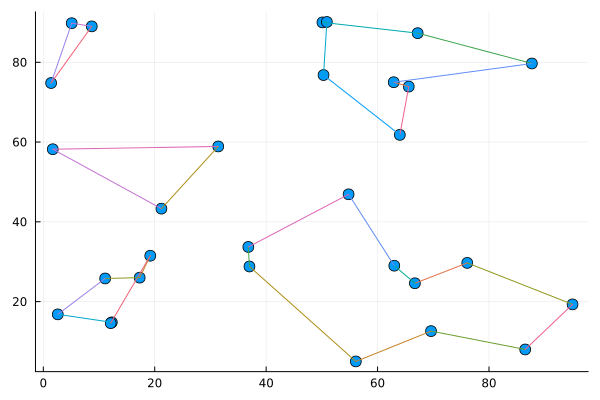

In [7]:
using JuMP
import GLPK
import Gurobi
using BenchmarkTools
using Plots

function display_solution(problem, route)
    x_pos = [c.x for c in problem.deliveries]
    y_pos = [c.y for c in problem.deliveries]
    plot_result = scatter(x_pos, y_pos, shape = :circle, markersize = 6)
    for i in 1:length(problem.deliveries)
        for j in 1:length(problem.deliveries)
            val = route[i, j]
            if val > 0
                del1 = problem.deliveries[i]
                del2 = problem.deliveries[j]
                plot!([del1.x, del2.x], [del1.y, del2.y], legend = false)
            end
        end
    end
    return plot_result
end;

function solve_tsp(deliveries::Int64, solver, show_viz=false)
    problem=random_instance(deliveries)
    travelmatrix = calc_travelmatrix(problem.deliveries)
    model = Model(solver)
    set_silent(model)
    # route is an adjence matrix representing a route traveled
    route=@variable(model, route[1:length(problem.deliveries), 1:length(problem.deliveries)], Bin)

    # ensure all events are planned
    @constraint(model, [i = 1:length(problem.deliveries)], sum(route[i, :]) == 1.0)
    @constraint(model, [c = 1:length(problem.deliveries)], sum(route[:, c]) == 1.0)
    # disallow traveling to itself
    @constraint(model, [j = 1:length(problem.deliveries)], route[j, j] == 0)

    traveltime = travelmatrix.* route 
    @objective(model, Min, sum(traveltime))

    function callback(cb_data)
        status = callback_node_status(cb_data, model)
        if status == MOI.CALLBACK_NODE_STATUS_FRACTIONAL
            return
        end
        x_val = callback_value.(cb_data, route)
        x_val = round.(x_val)
        x_val = Int64.(x_val)
        cycle = shortest_subtour(x_val)
        sub_inds = [(i, j) for (i, j) in Iterators.product(cycle, cycle) if i != j]
        if length(sub_inds) > 0
            con = @build_constraint(sum(route[i, j] for (i,j) in sub_inds) <= length(cycle) -1 )
            MOI.submit(model, MOI.LazyConstraint(cb_data), con)
        end
    end
    MOI.set(model, MOI.LazyConstraintCallback(), callback)
    optimize!(model)
    route_val = JuMP.value.(route)
    if show_viz
        println(termination_status(model))
        return display_solution(problem, route_val)
    end
end

@time solve_tsp(30, GLPK.Optimizer, true)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-21
OPTIMAL
  6.956979 seconds (9.84 M allocations: 373.699 MiB, 1.93% gc time, 30.69% compilation time)


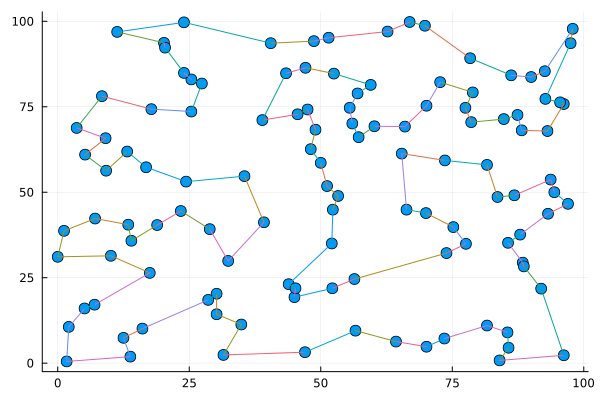

In [8]:
@time solve_tsp(120, Gurobi.Optimizer, true)

In [9]:
@benchmark solve_tsp(30, GLPK.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  170.064 ms …    2.960 s  ┊ GC (min … max): 2.78% … 1.70%
 Time  (median):        1.056 s               ┊ GC (median):    2.22%
 Time  (mean ± σ):      1.012 s ± 613.784 ms  ┊ GC (mean ± σ):  2.19% ± 0.37%

  ▁  ▁▁▁▁   ▁▁ ▁▁   ▁ █ ▁█▁  █ ▁                              ▁  
  █▁▁████▁▁▁██▁██▁▁▁█▁█▁███▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  170 ms           Histogram: frequency by time          2.96 s <

 Memory estimate: 26.47 MiB, allocs estimate: 791677.

In [27]:
@benchmark solve_tsp(50, Gurobi.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  197.114 ms … 367.954 ms  ┊ GC (min … max): 0.96% … 0.52%
 Time  (median):     272.240 ms               ┊ GC (median):    0.69%
 Time  (mean ± σ):   278.964 ms ±  46.898 ms  ┊ GC (mean ± σ):  0.64% ± 0.28%

  ▁        ▁ ▁ ▁   █▁ ▁   ▁ █     ▁█  ▁     ▁       ▁▁     ▁  ▁  
  █▁▁▁▁▁▁▁▁█▁█▁█▁▁▁██▁█▁▁▁█▁█▁▁▁▁▁██▁▁█▁▁▁▁▁█▁▁▁▁▁▁▁██▁▁▁▁▁█▁▁█ ▁
  197 ms           Histogram: frequency by time          368 ms <

 Memory estimate: 17.85 MiB, allocs estimate: 433271.

In [28]:
@benchmark solve_tsp(80, Gurobi.Optimizer) evals=3 samples=20 seconds=3600

BenchmarkTools.Trial: 20 samples with 3 evaluations.
 Range (min … max):  1.144 s …    2.998 s  ┊ GC (min … max): 0.42% … 0.23%
 Time  (median):     1.438 s               ┊ GC (median):    0.48%
 Time  (mean ± σ):   1.549 s ± 408.606 ms  ┊ GC (mean ± σ):  0.45% ± 0.08%

      ▃   █     ▃                                             
  ▇▇▇▁█▇▁▇█▇▇▇▁▁█▁▁▇▇▁▇▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▇ ▁
  1.14 s         Histogram: frequency by time            3 s <

 Memory estimate: 80.26 MiB, allocs estimate: 2343496.